In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stocks = pd.read_csv('/kaggle/input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv')
stocks.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0
5,1999-01-29 00:00:00-05:00,0.038098,0.038218,0.036307,0.036307,244032000,0.0,0.0
6,1999-02-01 00:00:00-05:00,0.036307,0.037262,0.036307,0.037024,154704000,0.0,0.0
7,1999-02-02 00:00:00-05:00,0.036307,0.037262,0.033083,0.034158,264096000,0.0,0.0
8,1999-02-03 00:00:00-05:00,0.033680,0.035352,0.033440,0.034874,75120000,0.0,0.0
9,1999-02-04 00:00:00-05:00,0.035352,0.037740,0.034874,0.036784,181920000,0.0,0.0


In [12]:
stocks.columns
stocks['Date'] = pd.to_datetime(stocks['Date'])

/tmp/ipykernel_47/1999176847.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stocks['Date'] = pd.to_datetime(stocks['Date'])


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

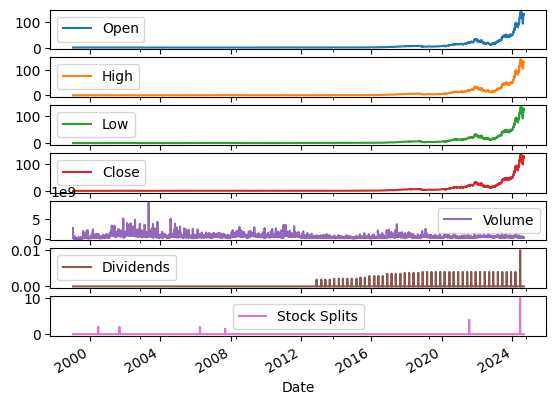

In [14]:
stocks.plot(x='Date', subplots=True)

Text(0.5, 0, 'Volume')

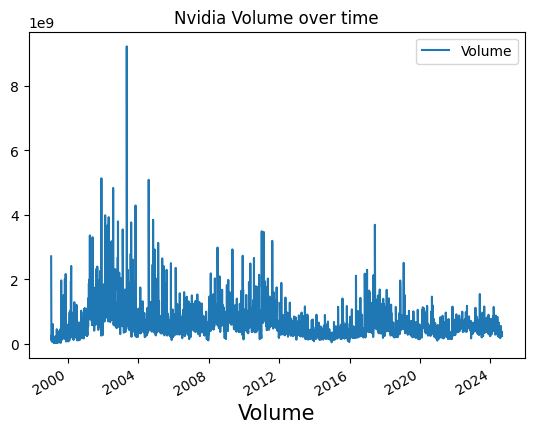

In [16]:
stocks.plot('Date', 'Volume', title="Nvidia Volume over time")
plt.xlabel('Volume', fontsize=15)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

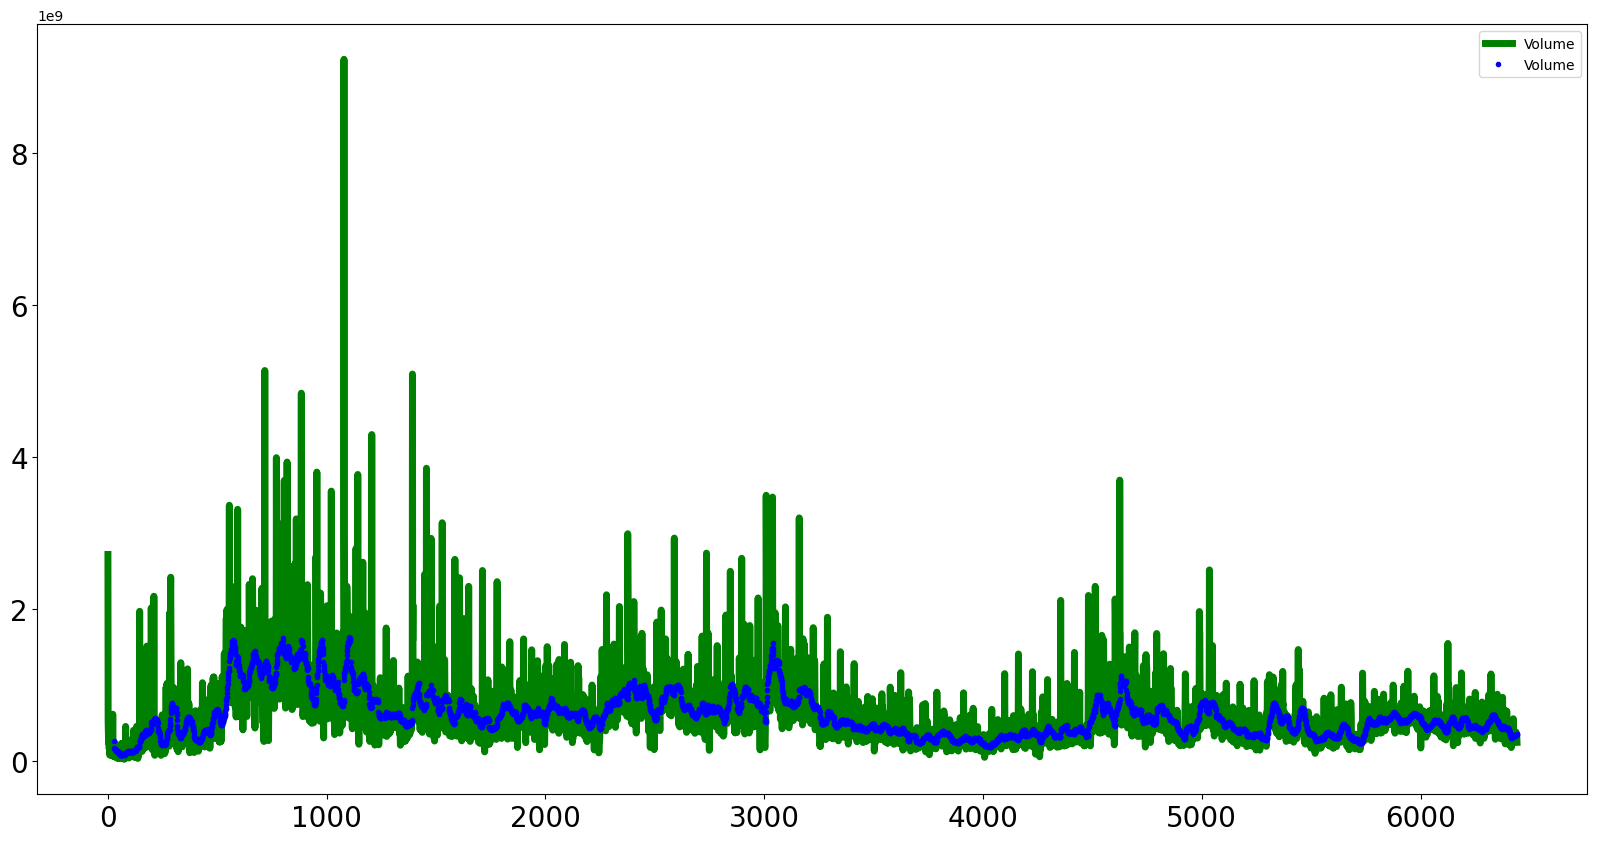

In [22]:
# Now I want to smooth this out, using rolling averages.
# Then I will concatenate it.

new_df = pd.concat([stocks['Volume'], stocks['Volume'].rolling(window=30).mean()], axis=1)
ax = new_df.plot(figsize=(20,10), linewidth=5, fontsize=20, style= ['g', 'b.'])
